In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import geopandas as gpd
%matplotlib inline

In [16]:
data2017=pd.read_json('./2017data.json')
data2016=pd.read_json('./2016data.json')
danZone2017=pd.read_json('./2017danZone.json')

In [17]:
data2017[(data2017.reg_name=='Москва')&(data2017.latitude<=56.1)&(data2017.longitude<=38.0)&(data2017.latitude>=55.0)&(data2017.longitude>=36.8)]

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
112,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45910000,"ЦФО, Москва, Юго-Западный АО, Ясенево",Наезд на стоящее ТС,20181231,2020-06-11 07:30:00,Несоответствие скорости конкретным условиям дв...,1,0,2,2,55.584676,37.558179
132,45,Москва,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,45382000,"ЦФО, Москва, Центральный АО, Тверской",Наезд на пешехода,20181231,2020-06-11 01:05:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,55.776157,37.585698
145,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45321000,"ЦФО, Москва, Западный АО, Можайский",Столкновение,20181230,2020-06-11 21:30:00,Неправильный выбор дистанции,1,0,2,2,55.720439,37.382677
322,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45327000,"ЦФО, Москва, Западный АО, Тропарево-Никулино",Наезд на пешехода,20181230,2020-06-11 06:45:00,Несоответствие скорости конкретным условиям дв...,2,0,3,3,55.647725,37.449560
335,45,Москва,,Третье транспортное кольцо - внешняя сторона,Региональная или межмуниципальная дорога общег...,45388000,"ЦФО, Москва, Юго-Восточный АО, Лефортово",Столкновение,20181230,2020-06-11 03:25:00,Превышение установленной скорости движения,3,0,2,4,55.768547,37.692139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47967,45,Москва,А-106,Рублево-Успенское шоссе,Федеральная дорога общего пользования,,"ЦФО, Москва, Участки обслуживания на территори...",Столкновение,20180101,2020-06-11 15:55:00,Неправильный выбор дистанции,1,0,2,3,55.723938,37.178616
47973,45,Москва,М-3,"""Украина"" Москва - Калуга - Брянск - граница с...",Федеральная дорога общего пользования,45952000,"ЦФО, Москва, Московский",Наезд на стоящее ТС,20180101,2020-06-11 15:05:00,Неправильный выбор дистанции,3,0,2,3,55.627153,37.422925
47988,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45910000,"ЦФО, Москва, Юго-Западный АО, Ясенево",Наезд на стоящее ТС,20180101,2020-06-11 10:15:00,Несоответствие скорости конкретным условиям дв...,3,0,3,4,55.596406,37.510740
48007,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45307000,"ЦФО, Москва, Восточный АО, Измайлово",Столкновение,20180101,2020-06-11 06:50:00,Нарушение правил перестроения,1,0,2,3,55.797000,37.840000


In [ ]:
danZone2017[(danZone2017.reg_name=='Московская область')]

In [18]:
data2017=data2017[(data2017.reg_name=='Москва')&(data2017.latitude<=56.1)&(data2017.longitude<=38.0)&(data2017.latitude>=55.0)&(data2017.longitude>=36.8)]

In [19]:
dtp_points=gpd.points_from_xy(data2017.longitude,data2017.latitude)
crs = {'init' :'epsg:3857'}
dtp = gpd.GeoDataFrame(data2017,crs=crs, geometry=dtp_points)
dtp

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude,geometry
112,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45910000,"ЦФО, Москва, Юго-Западный АО, Ясенево",Наезд на стоящее ТС,20181231,2020-06-11 07:30:00,Несоответствие скорости конкретным условиям дв...,1,0,2,2,55.584676,37.558179,POINT (37.55818 55.58468)
132,45,Москва,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,45382000,"ЦФО, Москва, Центральный АО, Тверской",Наезд на пешехода,20181231,2020-06-11 01:05:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,55.776157,37.585698,POINT (37.58570 55.77616)
145,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45321000,"ЦФО, Москва, Западный АО, Можайский",Столкновение,20181230,2020-06-11 21:30:00,Неправильный выбор дистанции,1,0,2,2,55.720439,37.382677,POINT (37.38268 55.72044)
322,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45327000,"ЦФО, Москва, Западный АО, Тропарево-Никулино",Наезд на пешехода,20181230,2020-06-11 06:45:00,Несоответствие скорости конкретным условиям дв...,2,0,3,3,55.647725,37.449560,POINT (37.44956 55.64773)
335,45,Москва,,Третье транспортное кольцо - внешняя сторона,Региональная или межмуниципальная дорога общег...,45388000,"ЦФО, Москва, Юго-Восточный АО, Лефортово",Столкновение,20181230,2020-06-11 03:25:00,Превышение установленной скорости движения,3,0,2,4,55.768547,37.692139,POINT (37.69214 55.76855)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47967,45,Москва,А-106,Рублево-Успенское шоссе,Федеральная дорога общего пользования,,"ЦФО, Москва, Участки обслуживания на территори...",Столкновение,20180101,2020-06-11 15:55:00,Неправильный выбор дистанции,1,0,2,3,55.723938,37.178616,POINT (37.17862 55.72394)
47973,45,Москва,М-3,"""Украина"" Москва - Калуга - Брянск - граница с...",Федеральная дорога общего пользования,45952000,"ЦФО, Москва, Московский",Наезд на стоящее ТС,20180101,2020-06-11 15:05:00,Неправильный выбор дистанции,3,0,2,3,55.627153,37.422925,POINT (37.42292 55.62715)
47988,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45910000,"ЦФО, Москва, Юго-Западный АО, Ясенево",Наезд на стоящее ТС,20180101,2020-06-11 10:15:00,Несоответствие скорости конкретным условиям дв...,3,0,3,4,55.596406,37.510740,POINT (37.51074 55.59641)
48007,45,Москва,,Московская кольцевая автомобильная дорога (МКА...,Региональная или межмуниципальная дорога общег...,45307000,"ЦФО, Москва, Восточный АО, Измайлово",Столкновение,20180101,2020-06-11 06:50:00,Нарушение правил перестроения,1,0,2,3,55.797000,37.840000,POINT (37.84000 55.79700)


In [ ]:
data2016[((data2016.reg_name=='Московская область') & (data2016.crash_type_name=='Наезд на пешехода'))]

In [5]:
mo_gdf = gpd.read_file('./data/highway-line.shp')
mo_gdf

,NAME,NAME_EN,NAME_RU,REF,HIGHWAY,ONEWAY,BRIDGE,TUNNEL,MAXSPEED,LANES,WIDTH,SURFACE,OSM_TYPE,OSM_ID,geometry
0,улица Говорова,None,улица Говорова,None,tertiary,yes,None,None,None,2,None,asphalt,way,4870954,"LINESTRING (37.39958 55.71580, 37.39895 55.71582)"
1,улица Толбухина,None,улица Толбухина,None,tertiary,yes,None,None,None,None,None,asphalt,way,4871028,"LINESTRING (37.39952 55.72415, 37.40012 55.72359)"
2,None,None,None,52B,secondary_link,yes,None,None,None,1,None,asphalt,way,4871185,"LINESTRING (37.40050 55.70100, 37.40038 55.701..."
3,Олимпийский проспект,None,None,None,secondary,yes,None,None,None,2,None,asphalt,way,10620262,"LINESTRING (37.62229 55.79236, 37.62230 55.79214)"
4,None,None,None,None,service,None,None,None,None,None,None,asphalt,way,10630716,"LINESTRING (37.62962 55.78621, 37.62973 55.786..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303470,Кронштадтский бульвар,Kronshtadsky Boulevard,None,None,secondary,None,None,None,None,2,None,asphalt,way,5184764,"LINESTRING (37.48732 55.83979, 37.48729 55.839..."
303471,None,None,None,None,secondary,yes,None,None,None,None,None,asphalt,way,5173791,"LINESTRING (37.50450 55.86224, 37.50454 55.862..."
303472,None,None,None,None,service,None,None,None,None,None,None,None,way,5184770,"LINESTRING (37.50074 55.84615, 37.50062 55.846..."
303473,Славянская площадь,None,Славянская площадь,None,secondary,yes,None,None,60,1,None,asphalt,way,5169728,"LINESTRING (37.63529 55.75386, 37.63523 55.753..."


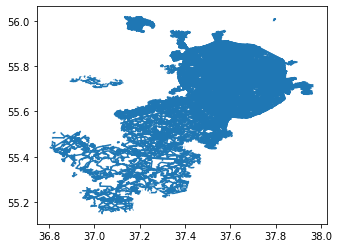

In [6]:
mo_gdf.plot()

In [30]:
mo_gdf_wm = mo_gdf.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
#mo_gdf_wm.plot(linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


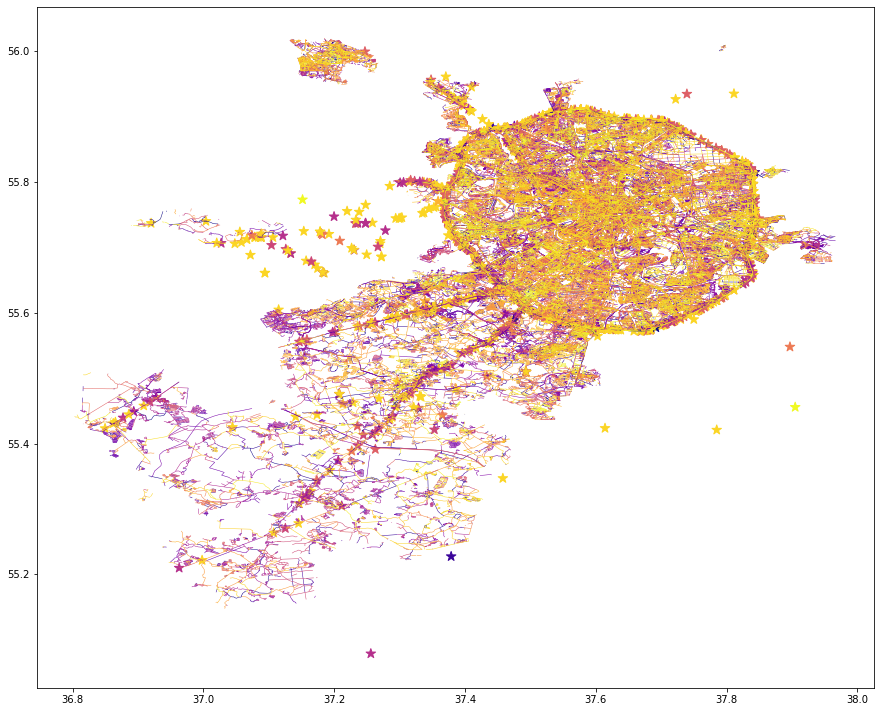

In [34]:
base = dtp.plot(column='crash_type_name',marker='*',markersize=100, cmap='plasma', figsize=[15,15])
mo_gdf.plot(ax=base,linewidth=0.5, cmap='plasma',figsize=[15,15])
#mo_gdf_wm.plot(ax=base,linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])

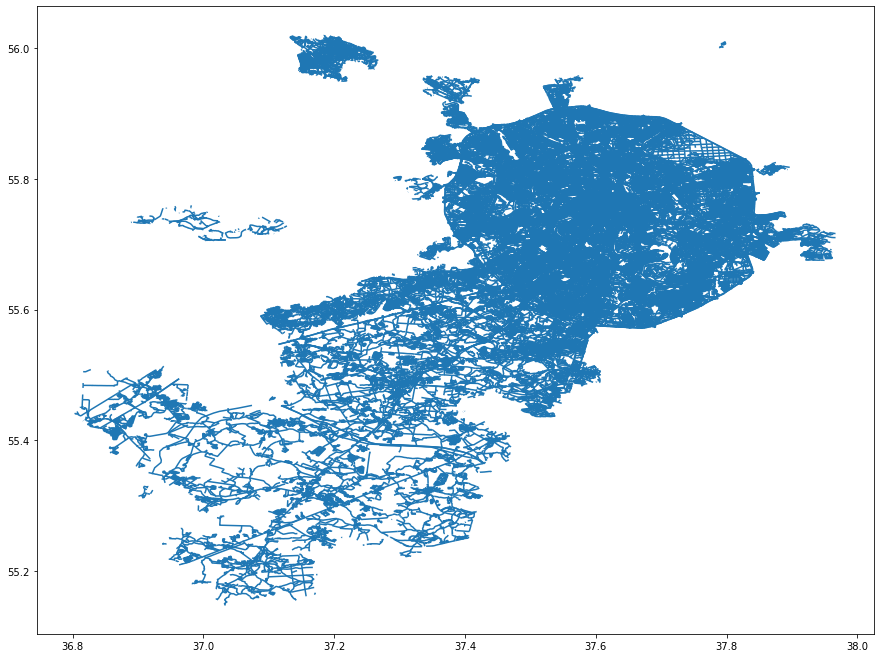

In [7]:
mo_gdf.plot(figsize=[15,15])

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


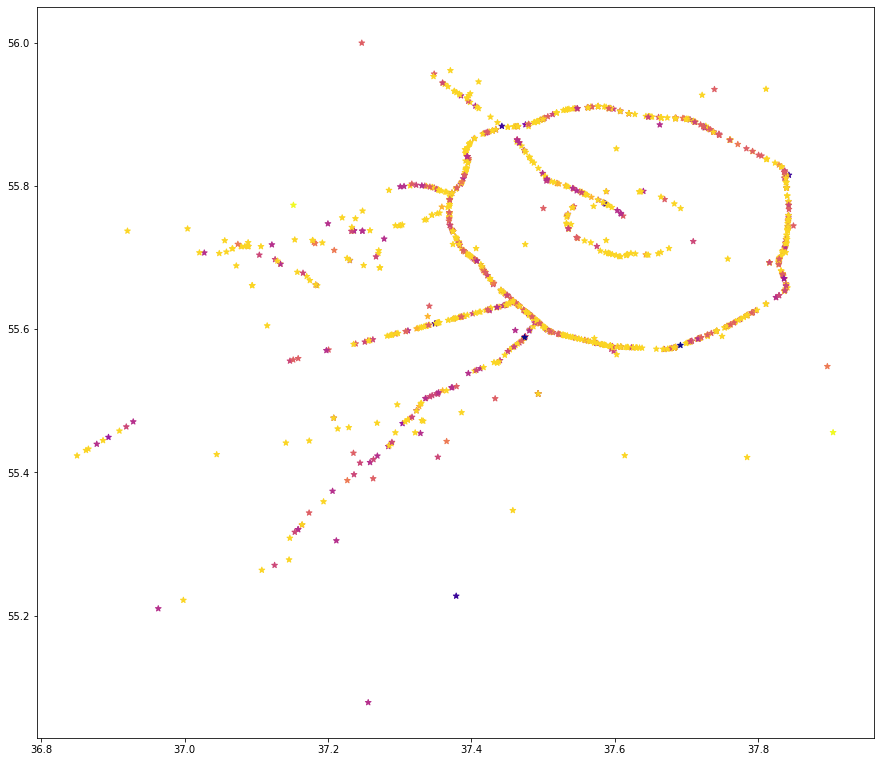

In [28]:
dtp_gdf_wm = dtp.to_crs({'init' :'epsg:3857'}) #непосредственно преобразование проекции
dtp_gdf_wm.plot(column='crash_type_name',marker='*', cmap='plasma', figsize=[15,15])
